In [25]:
import math
import pandas as pd
import numpy as np

import warnings
warnings.filterwarnings('ignore')

pd.set_option('display.max_columns', None)
pd.set_option('display.expand_frame_repr', False)


import matplotlib.pyplot as plt

In [26]:
deliveries = pd.read_csv('all_matches.csv')

In [27]:
deliveries.head(2)

,match_id,season,start_date,venue,innings,ball,batting_team,bowling_team,striker,non_striker,bowler,runs_off_bat,extras,wides,noballs,byes,legbyes,penalty,wicket_type,player_dismissed,other_wicket_type,other_player_dismissed
0,335982,2007/08,2008-04-18,M Chinnaswamy Stadium,1,0.1,Kolkata Knight Riders,Royal Challengers Bangalore,SC Ganguly,BB McCullum,P Kumar,0,1,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN
1,335982,2007/08,2008-04-18,M Chinnaswamy Stadium,1,0.2,Kolkata Knight Riders,Royal Challengers Bangalore,BB McCullum,SC Ganguly,P Kumar,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [28]:
deliveries.venue.unique()

array(['M Chinnaswamy Stadium',
       'Punjab Cricket Association Stadium, Mohali', 'Feroz Shah Kotla',
       'Eden Gardens', 'Wankhede Stadium', 'Sawai Mansingh Stadium',
       'Rajiv Gandhi International Stadium, Uppal',
       'MA Chidambaram Stadium, Chepauk', 'Dr DY Patil Sports Academy',
       'Newlands', "St George's Park", 'Kingsmead', 'SuperSport Park',
       'Buffalo Park', 'New Wanderers Stadium', 'De Beers Diamond Oval',
       'OUTsurance Oval', 'Brabourne Stadium',
       'Sardar Patel Stadium, Motera', 'Barabati Stadium',
       'Brabourne Stadium, Mumbai',
       'Vidarbha Cricket Association Stadium, Jamtha',
       'Himachal Pradesh Cricket Association Stadium', 'Nehru Stadium',
       'Holkar Cricket Stadium',
       'Dr. Y.S. Rajasekhara Reddy ACA-VDCA Cricket Stadium',
       'Subrata Roy Sahara Stadium',
       'Maharashtra Cricket Association Stadium',
       'Shaheed Veer Narayan Singh International Stadium',
       'JSCA International Stadium Complex', 'Sh

In [29]:
deliveries.batting_team.unique()

array(['Kolkata Knight Riders', 'Royal Challengers Bangalore',
       'Chennai Super Kings', 'Kings XI Punjab', 'Rajasthan Royals',
       'Delhi Daredevils', 'Deccan Chargers', 'Mumbai Indians',
       'Kochi Tuskers Kerala', 'Pune Warriors', 'Sunrisers Hyderabad',
       'Rising Pune Supergiants', 'Gujarat Lions',
       'Rising Pune Supergiant', 'Delhi Capitals', 'Punjab Kings',
       'Lucknow Super Giants', 'Gujarat Titans',
       'Royal Challengers Bengaluru'], dtype=object)

In [30]:
cdf = deliveries[deliveries.venue.isin(['MA Chidambaram Stadium, Chepauk','MA Chidambaram Stadium, Chepauk, Chennai'])]
cdf.tail(2)

,match_id,season,start_date,venue,innings,ball,batting_team,bowling_team,striker,non_striker,bowler,runs_off_bat,extras,wides,noballs,byes,legbyes,penalty,wicket_type,player_dismissed,other_wicket_type,other_player_dismissed
255757,1426287,2024,2024-05-01,"MA Chidambaram Stadium, Chepauk, Chennai",2,17.5,Punjab Kings,Chennai Super Kings,SM Curran,Shashank Singh,RJ Gleeson,0,1,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN
255758,1426287,2024,2024-05-01,"MA Chidambaram Stadium, Chepauk, Chennai",2,17.6,Punjab Kings,Chennai Super Kings,Shashank Singh,SM Curran,RJ Gleeson,2,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [31]:
def balls_per_dismissal(balls, dismissals):
    if dismissals > 0:
        return balls/dismissals
    else:
        return balls/1 
    
def balls_per_boundary(balls, boundaries):
    if boundaries > 0:
        return balls/boundaries
    else:
        return balls/1

In [39]:
def phase(over):
    if over <= 6:
        return 'Powerplay'
    elif over <= 15:
        return 'Middle'
    else:
        return 'Death'

In [40]:
deliveries['phase'] = deliveries['ball'].apply(lambda x: phase(x))

In [56]:
deliveries.tail(2)

,match_id,season,start_date,venue,innings,ball,batting_team,bowling_team,striker,non_striker,bowler,runs_off_bat,extras,wides,noballs,byes,legbyes,penalty,wicket_type,player_dismissed,other_wicket_type,other_player_dismissed,phase
257851,1426296,2024,2024-05-09,"Himachal Pradesh Cricket Association Stadium, ...",2,16.6,Punjab Kings,Royal Challengers Bengaluru,Arshdeep Singh,RD Chahar,Mohammed Siraj,4,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Death
257852,1426296,2024,2024-05-09,"Himachal Pradesh Cricket Association Stadium, ...",2,16.7,Punjab Kings,Royal Challengers Bengaluru,Arshdeep Singh,RD Chahar,Mohammed Siraj,0,0,NaN,NaN,NaN,NaN,NaN,caught,Arshdeep Singh,NaN,NaN,Death


In [162]:
def AgainstCskInChepauk(df, current_phase, current_innings):

    df = df[df.bowling_team == 'Chennai Super Kings']
    df = df[df.venue.isin(['MA Chidambaram Stadium, Chepauk','MA Chidambaram Stadium, Chepauk, Chennai'])]
    df = df[df.phase == current_phase]
    df = df[df.innings == current_innings]
    df.reset_index(inplace = True, drop = True)
    
    df['isDot'] = df['runs_off_bat'].apply(lambda x: 1 if x == 0 else 0)
    df['isOne'] = df['runs_off_bat'].apply(lambda x: 1 if x == 1 else 0)
    df['isTwo'] = df['runs_off_bat'].apply(lambda x: 1 if x == 2 else 0)
    df['isThree'] = df['runs_off_bat'].apply(lambda x: 1 if x == 3 else 0)
    df['isFour'] = df['runs_off_bat'].apply(lambda x: 1 if x == 4 else 0)
    df['isSix'] = df['runs_off_bat'].apply(lambda x: 1 if x == 6 else 0)

    runs = pd.DataFrame(df.groupby(['striker'])['runs_off_bat'].sum().reset_index()).groupby(['striker'])['runs_off_bat'].sum().reset_index().rename(columns={'runs_off_bat':'runs'})
    innings = pd.DataFrame(df.groupby(['striker'])['match_id'].apply(lambda x: len(list(np.unique(x)))).reset_index()).rename(columns = {'match_id':'innings'})
    balls = pd.DataFrame(df.groupby(['striker'])['match_id'].count()).reset_index().rename(columns = {'match_id':'balls'})
    dismissals = pd.DataFrame(df.groupby(['striker'])['player_dismissed'].count()).reset_index().rename(columns = {'player_dismissed':'dismissals'})

    dots = pd.DataFrame(df.groupby(['striker'])['isDot'].sum()).reset_index().rename(columns = {'isDot':'dots'})
    ones = pd.DataFrame(df.groupby(['striker'])['isOne'].sum()).reset_index().rename(columns = {'isOne':'ones'})
    twos = pd.DataFrame(df.groupby(['striker'])['isTwo'].sum()).reset_index().rename(columns = {'isTwo':'twos'})
    threes = pd.DataFrame(df.groupby(['striker'])['isThree'].sum()).reset_index().rename(columns = {'isThree':'threes'})
    fours = pd.DataFrame(df.groupby(['striker'])['isFour'].sum()).reset_index().rename(columns = {'isFour':'fours'})
    sixes = pd.DataFrame(df.groupby(['striker'])['isSix'].sum()).reset_index().rename(columns = {'isSix':'sixes'})

    df = pd.merge(innings, runs, on = 'striker').merge(balls, on = 'striker').merge(dismissals, on = 'striker').merge(dots, on = 'striker').merge(ones, on = 'striker').merge(twos, on = 'striker').merge(threes, on = 'striker').merge(fours, on = 'striker').merge(sixes, on = 'striker')
    
    #Strike Rate (SR)
    df['SR'] = df.apply(lambda x: 100*(x['runs']/x['balls']), axis = 1)

    #Runs per innings (RPI)
    df['RPI'] = df.apply(lambda x: x['runs']/x['innings'], axis = 1)

    #Balls per dismissals (BPD)
    df['BPD'] = df.apply(lambda x: balls_per_dismissal(x['balls'], x['dismissals']), axis = 1)

    #Balls per boundary (BPB)
    df['BPB'] = df.apply(lambda x: balls_per_boundary(x['balls'], (x['fours'] + x['sixes'])), axis = 1)    
    
    return df

In [163]:
powerplay_df1 = AgainstCskInChepauk(deliveries, 'Powerplay', 1)

In [164]:
powerplay_df2 = AgainstCskInChepauk(deliveries, 'Powerplay', 2)

In [165]:
middle_df1 = AgainstCskInChepauk(deliveries, 'Middle', 1)

In [166]:
middle_df2 = AgainstCskInChepauk(deliveries, 'Middle', 2)

In [167]:
death_df1 = AgainstCskInChepauk(deliveries, 'Death', 1)

In [168]:
death_df2 = AgainstCskInChepauk(deliveries, 'Death', 2)

In [169]:
powerplay_df1

,striker,innings,runs,balls,dismissals,dots,ones,twos,threes,fours,sixes,SR,RPI,BPD,BPB
0,A Mishra,1,1,5,0,4,1,0,0,0,0,20.000000,1.000000,5.0,5.000000
1,A Raghuvanshi,1,24,17,0,7,6,0,0,3,1,141.176471,24.000000,17.0,4.250000
2,A Symonds,1,0,7,0,7,0,0,0,0,0,0.000000,0.000000,7.0,7.000000
3,AC Gilchrist,1,38,20,1,9,4,0,0,4,3,190.000000,38.000000,20.0,2.857143
4,AD Mathews,1,2,8,0,7,0,1,0,0,0,25.000000,2.000000,8.0,8.000000
5,AJ Finch,1,37,25,0,12,5,0,0,8,0,148.000000,37.000000,25.0,3.125000
6,AM Rahane,2,30,23,1,8,8,3,0,4,0,130.434783,15.000000,23.0,5.750000
7,Abhishek Sharma,1,24,18,0,7,6,2,0,2,1,133.333333,24.000000,18.0,6.000000
8,BB McCullum,2,24,16,2,9,2,1,0,2,2,150.000000,12.000000,8.0,4.000000
9,C Green,2,6,7,1,4,2,0,0,1,0,85.714286,3.000000,7.0,7.000000


In [170]:
powerplay_df2

,striker,innings,runs,balls,dismissals,dots,ones,twos,threes,fours,sixes,SR,RPI,BPD,BPB
0,AB de Villiers,3,40,28,1,13,6,1,0,8,0,142.857143,13.333333,28.0,3.500000
1,AC Gilchrist,1,37,25,0,12,5,2,0,4,2,148.000000,37.000000,25.0,4.166667
2,AK Markram,1,19,13,0,3,7,0,0,3,0,146.153846,19.000000,13.0,4.333333
3,AM Rahane,1,23,17,1,8,3,2,0,4,0,135.294118,23.000000,17.0,4.250000
4,AUK Pathan,1,14,6,1,3,0,0,0,2,1,233.333333,14.000000,6.0,2.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
81,V Shankar,1,8,8,0,5,2,0,0,0,1,100.000000,8.000000,8.0,8.000000
82,VR Iyer,1,9,4,1,1,1,0,0,2,0,225.000000,9.000000,4.0,2.000000
83,WP Saha,2,33,29,2,14,9,0,0,6,0,113.793103,16.500000,14.5,4.833333
84,Y Gnaneswara Rao,1,15,13,0,5,5,1,0,2,0,115.384615,15.000000,13.0,6.500000


In [171]:
middle_df1.head(30)

,striker,innings,runs,balls,dismissals,dots,ones,twos,threes,fours,sixes,SR,RPI,BPD,BPB
0,A Mishra,1,14,16,1,9,4,1,0,2,0,87.500000,14.0,16.0,8.000000
1,A Raghuvanshi,1,0,1,1,1,0,0,0,0,0,0.000000,0.0,1.0,1.000000
2,A Symonds,1,27,27,0,12,11,1,0,2,1,100.000000,27.0,27.0,9.000000
3,AB Agarkar,1,6,2,0,0,0,1,0,1,0,300.000000,6.0,2.0,2.000000
4,AB de Villiers,1,37,20,0,4,8,1,1,6,0,185.000000,37.0,20.0,3.333333
5,AD Mathews,1,35,29,0,11,13,1,0,2,2,120.689655,35.0,29.0,7.250000
6,AJ Finch,1,30,21,1,7,10,0,0,2,2,142.857143,30.0,21.0,5.250000
7,AK Markram,1,12,12,1,3,8,0,0,1,0,100.000000,12.0,12.0,12.000000
8,AL Menaria,2,22,30,1,14,12,3,0,1,0,73.333333,11.0,30.0,30.000000
9,AM Rahane,1,1,3,1,2,1,0,0,0,0,33.333333,1.0,3.0,3.000000


In [172]:
middle_df2

,striker,innings,runs,balls,dismissals,dots,ones,twos,threes,fours,sixes,SR,RPI,BPD,BPB
0,A Badoni,1,5,5,0,1,3,1,0,0,0,100.000000,5.000000,5.0,5.000000
1,A Mithun,1,11,8,1,3,3,0,0,2,0,137.500000,11.000000,8.0,4.000000
2,AB de Villiers,3,51,41,1,13,18,4,1,4,1,124.390244,17.000000,41.0,8.200000
3,AC Gilchrist,1,17,12,1,4,5,0,0,3,0,141.666667,17.000000,12.0,4.000000
4,AD Mathews,1,7,7,0,1,5,1,0,0,0,100.000000,7.000000,7.0,7.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
111,Y Gnaneswara Rao,1,4,5,1,4,0,0,0,1,0,80.000000,4.000000,5.0,5.000000
112,Y Venugopal Rao,2,40,28,0,10,12,1,0,2,3,142.857143,20.000000,28.0,5.600000
113,YK Pathan,3,28,33,1,15,14,2,0,1,1,84.848485,9.333333,33.0,16.500000
114,Yuvraj Singh,3,37,40,2,16,17,4,0,3,0,92.500000,12.333333,20.0,13.333333


In [173]:
death_df1

,striker,innings,runs,balls,dismissals,dots,ones,twos,threes,fours,sixes,SR,RPI,BPD,BPB
0,A Ashish Reddy,1,36,16,0,4,5,1,1,2,3,225.000000,36.0,16.0,3.2
1,A Kumble,1,2,1,0,0,0,1,0,0,0,200.000000,2.0,1.0,1.0
2,A Symonds,1,23,12,1,3,5,1,0,1,2,191.666667,23.0,12.0,4.0
3,A Zampa,1,1,1,1,0,1,0,0,0,0,100.000000,1.0,1.0,1.0
4,AB Agarkar,2,14,12,1,5,4,1,0,2,0,116.666667,7.0,12.0,6.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
79,Washington Sundar,1,9,6,0,0,5,0,0,1,0,150.000000,9.0,6.0,6.0
80,X Thalaivan Sargunam,1,2,3,1,2,0,1,0,0,0,66.666667,2.0,3.0,3.0
81,Y Nagar,1,23,19,0,7,7,3,0,1,1,121.052632,23.0,19.0,9.5
82,YK Pathan,1,5,3,1,1,1,0,0,1,0,166.666667,5.0,3.0,3.0


In [174]:
death_df2

,striker,innings,runs,balls,dismissals,dots,ones,twos,threes,fours,sixes,SR,RPI,BPD,BPB
0,A Ashish Reddy,1,3,3,1,1,1,1,0,0,0,100.000000,3.0,3.000000,3.0
1,A Badoni,1,18,14,1,2,6,6,0,0,0,128.571429,18.0,14.000000,14.0
2,A Mishra,2,6,10,3,6,2,2,0,0,0,60.000000,3.0,3.333333,10.0
3,A Nehra,2,1,3,1,2,1,0,0,0,0,33.333333,0.5,3.000000,3.0
4,AA Jhunjhunwala,2,8,5,1,2,2,0,0,0,1,160.000000,4.0,5.000000,5.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
126,Y Nagar,1,1,2,0,1,1,0,0,0,0,50.000000,1.0,2.000000,2.0
127,Y Venugopal Rao,1,0,1,1,1,0,0,0,0,0,0.000000,0.0,1.000000,1.0
128,YK Pathan,4,16,17,3,4,10,3,0,0,0,94.117647,4.0,5.666667,17.0
129,Yuvraj Singh,1,8,13,1,7,4,2,0,0,0,61.538462,8.0,13.000000,13.0


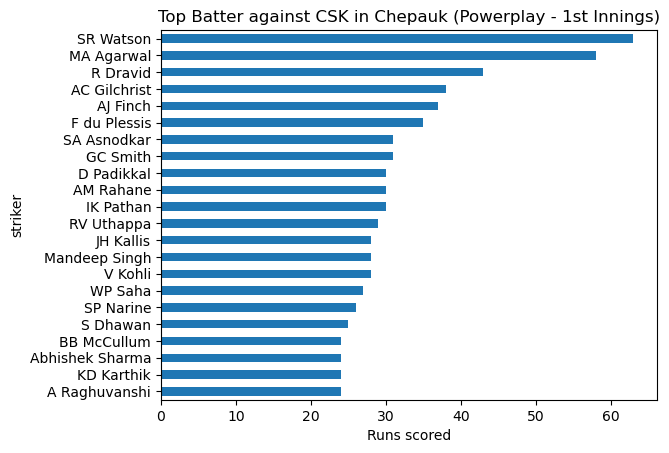

In [175]:
powerplay_df1 = powerplay_df1[powerplay_df1['runs'] > 20]
#powerplay_df1.sort_values(by = 'runs', ascending=False)
powerplay_df1.groupby(['striker'])['runs'].sum().sort_values(ascending = True).plot(kind ='barh')
plt.title('Top Batter against CSK in Chepauk (Powerplay - 1st Innings)')
plt.xlabel('Runs scored')
plt.show()

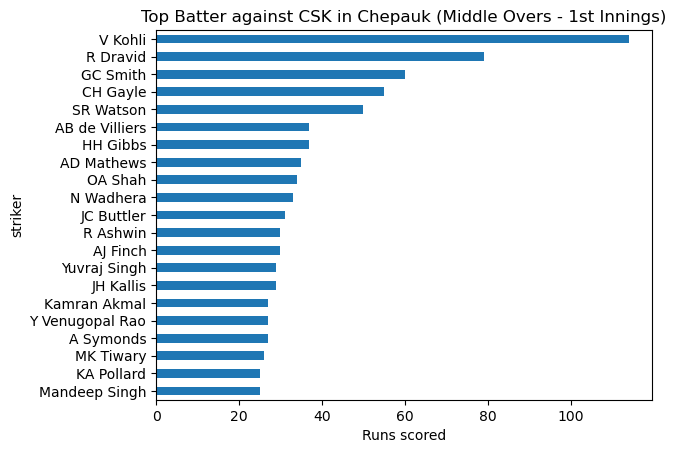

In [176]:
middle_df1 = middle_df1[middle_df1['runs'] >= 25]
middle_df1.sort_values(by = 'runs', ascending=False)
middle_df1.groupby(['striker'])['runs'].sum().sort_values(ascending = True).plot(kind ='barh')
plt.title('Top Batter against CSK in Chepauk (Middle Overs - 1st Innings)')
plt.xlabel('Runs scored')
plt.show()

In [177]:
death_df1 = death_df1[death_df1['runs'] >= 20]
death_df1.sort_values(by = 'runs', ascending=False)

,striker,innings,runs,balls,dismissals,dots,ones,twos,threes,fours,sixes,SR,RPI,BPD,BPB
43,LR Shukla,2,44,31,2,12,12,1,0,3,3,141.935484,22.000000,15.5,5.166667
76,V Kohli,3,38,24,3,8,8,4,0,1,3,158.333333,12.666667,8.0,6.000000
67,SPD Smith,1,37,13,0,1,5,1,0,3,3,284.615385,37.000000,13.0,2.166667
0,A Ashish Reddy,1,36,16,0,4,5,1,1,2,3,225.000000,36.000000,16.0,3.200000
38,KA Pollard,1,32,19,0,10,4,0,0,1,4,168.421053,32.000000,19.0,3.800000
40,KD Karthik,1,32,22,1,10,6,1,0,3,2,145.454545,32.000000,22.0,4.400000
5,AB de Villiers,2,31,16,2,4,3,5,0,3,1,193.750000,15.500000,8.0,4.000000
12,Anuj Rawat,1,30,15,0,6,4,0,0,2,3,200.000000,30.000000,15.0,3.000000
66,SO Hetmyer,1,30,19,0,6,8,1,0,2,2,157.894737,30.000000,19.0,4.750000
71,STR Binny,2,27,22,0,6,11,3,0,1,1,122.727273,13.500000,22.0,11.000000


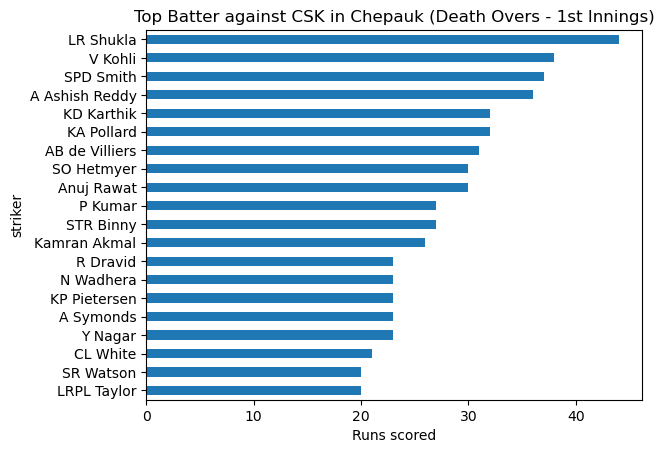

In [178]:
death_df1 = death_df1[death_df1['runs'] >= 20]
death_df1.sort_values(by = 'runs', ascending=False)
death_df1.groupby(['striker'])['runs'].sum().sort_values(ascending = True).plot(kind ='barh')
plt.title('Top Batter against CSK in Chepauk (Death Overs - 1st Innings)')
plt.xlabel('Runs scored')
plt.show()

In [179]:
powerplay_df1 = powerplay_df1[powerplay_df1['runs'] >= 20]
powerplay_df1.sort_values(by = 'runs', ascending=False)

,striker,innings,runs,balls,dismissals,dots,ones,twos,threes,fours,sixes,SR,RPI,BPD,BPB
52,SR Watson,2,63,44,0,18,14,1,1,8,2,143.181818,31.500000,44.0,4.400000
28,MA Agarwal,2,58,43,1,22,10,1,0,7,3,134.883721,29.000000,43.0,4.300000
37,R Dravid,3,43,42,0,23,11,1,0,6,1,102.380952,14.333333,42.0,6.000000
3,AC Gilchrist,1,38,20,1,9,4,0,0,4,3,190.000000,38.000000,20.0,2.857143
5,AJ Finch,1,37,25,0,12,5,0,0,8,0,148.000000,37.000000,25.0,3.125000
16,F du Plessis,1,35,24,1,13,3,0,0,8,0,145.833333,35.000000,24.0,3.000000
45,SA Asnodkar,1,31,18,0,9,3,0,0,4,2,172.222222,31.000000,18.0,3.000000
17,GC Smith,1,31,19,0,5,7,2,0,5,0,163.157895,31.000000,19.0,3.800000
22,IK Pathan,1,30,20,0,7,6,2,0,5,0,150.000000,30.000000,20.0,4.000000
12,D Padikkal,1,30,18,0,4,8,1,0,5,0,166.666667,30.000000,18.0,3.600000


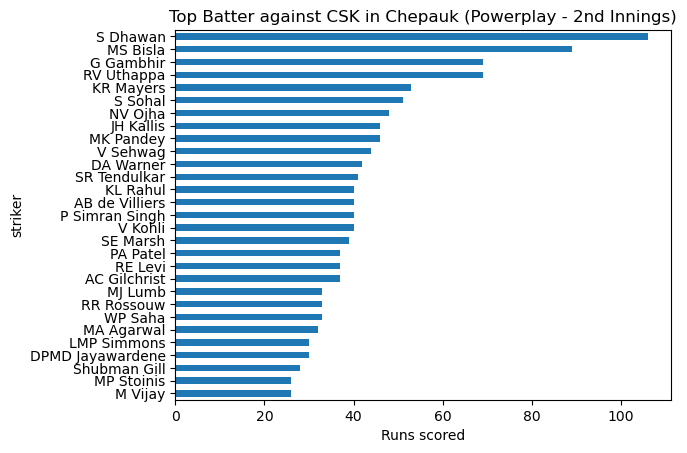

In [180]:
powerplay_df2 = powerplay_df2[powerplay_df2['runs'] >= 25]
powerplay_df2.sort_values(by = 'runs', ascending=False)
powerplay_df2.groupby(['striker'])['runs'].sum().sort_values(ascending = True).plot(kind ='barh')
plt.title('Top Batter against CSK in Chepauk (Powerplay - 2nd Innings)')
plt.xlabel('Runs scored')
plt.show()

In [181]:
middle_df2 = middle_df2[middle_df2['runs'] >= 40]
middle_df2.sort_values(by = 'runs', ascending=False)

,striker,innings,runs,balls,dismissals,dots,ones,twos,threes,fours,sixes,SR,RPI,BPD,BPB
40,JH Kallis,4,95,94,3,28,55,3,0,7,1,101.063830,23.750000,31.333333,11.750000
67,MS Bisla,3,89,66,2,20,31,5,0,6,4,134.848485,29.666667,33.000000,6.600000
32,G Gambhir,3,86,73,1,21,35,10,1,4,2,117.808219,28.666667,73.000000,12.166667
96,SE Marsh,2,83,47,1,10,25,1,0,5,6,176.595745,41.500000,47.000000,4.272727
66,MP Stoinis,2,81,52,1,10,29,5,0,3,5,155.769231,40.500000,52.000000,6.500000
107,V Kohli,3,78,61,3,20,24,10,0,4,3,127.868852,26.000000,20.333333,8.714286
24,DA Warner,3,72,73,2,28,32,9,0,1,3,98.630137,24.000000,36.500000,18.250000
102,SR Watson,2,71,37,1,10,15,1,0,6,5,191.891892,35.500000,37.000000,3.363636
71,NV Ojha,3,64,41,2,12,20,2,0,1,6,156.097561,21.333333,20.500000,5.857143
2,AB de Villiers,3,51,41,1,13,18,4,1,4,1,124.390244,17.000000,41.000000,8.200000


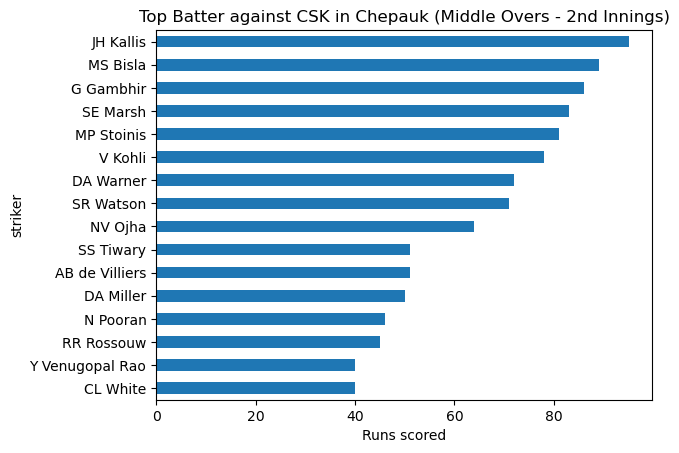

In [182]:
middle_df2 = middle_df2[middle_df2['runs'] >= 35]
middle_df2.sort_values(by = 'runs', ascending=False)
middle_df2.groupby(['striker'])['runs'].sum().sort_values(ascending = True).plot(kind ='barh')
plt.title('Top Batter against CSK in Chepauk (Middle Overs - 2nd Innings)')
plt.xlabel('Runs scored')
plt.show()

In [183]:
death_df2 = death_df2[death_df2['runs'] >= 20]
death_df2.sort_values(by = 'runs', ascending=False)


,striker,innings,runs,balls,dismissals,dots,ones,twos,threes,fours,sixes,SR,RPI,BPD,BPB
43,IK Pathan,3,68,32,2,6,12,5,0,4,5,212.500000,22.666667,16.0,3.555556
41,Harbhajan Singh,2,61,34,2,14,9,2,0,3,6,179.411765,30.500000,17.0,3.777778
6,AB de Villiers,2,39,24,1,6,7,7,0,3,1,162.500000,19.500000,24.0,6.000000
74,MP Stoinis,1,38,16,0,4,4,1,0,5,2,237.500000,38.000000,16.0,2.285714
14,AT Rayudu,2,36,14,0,2,6,1,0,1,4,257.142857,18.000000,14.0,2.800000
97,RN ten Doeschate,1,34,19,1,5,8,1,0,3,2,178.947368,34.000000,19.0,3.800000
24,CL White,2,32,23,2,7,12,0,0,2,2,139.130435,16.000000,11.5,5.750000
73,MK Tiwary,3,32,16,2,4,6,1,0,3,2,200.000000,10.666667,8.0,3.200000
35,G Gambhir,3,32,24,2,8,9,2,1,4,0,133.333333,10.666667,12.0,6.000000
10,AM Nayar,1,32,13,0,1,6,0,0,5,1,246.153846,32.000000,13.0,2.166667


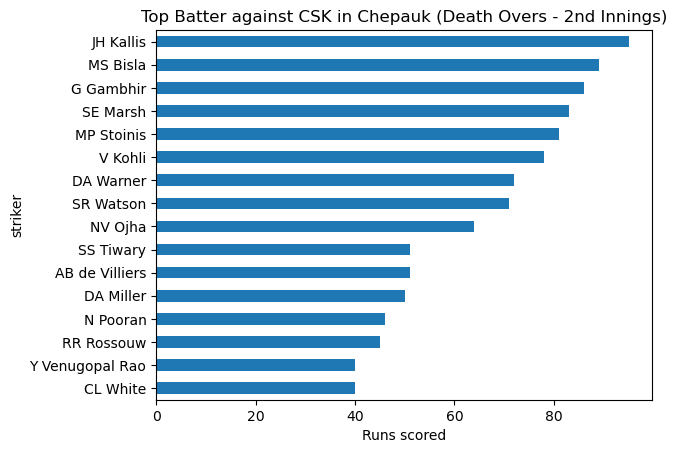

In [184]:
death_df2 = death_df2[death_df2['runs'] >= 25]
death_df2.sort_values(by = 'runs', ascending=False)
middle_df2.groupby(['striker'])['runs'].sum().sort_values(ascending = True).plot(kind ='barh')
plt.title('Top Batter against CSK in Chepauk (Death Overs - 2nd Innings)')
plt.xlabel('Runs scored')
plt.show()